In [ ]:
%load_ext autoreload

import numpy as np
from PIL import Image

In [8]:


x = np.array([1,2])
tuple(x)

(1, 2)

/tf/maskrcnn-benchmark/my_tools/generator
xxx
here


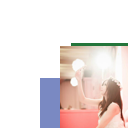

In [202]:
%cd /tf/maskrcnn-benchmark/my_tools/generator
%autoreload 2

from config import get_parameters
import blocks as bk

class Sampler:
    def __init__(self, blocks, opt):
        self.blocks = blocks
        self.imsize = opt.imsize
        pass

    def sample(self):
        im = Image.new("RGBA", (self.imsize, self.imsize))
        for bk in self.blocks:
            # bk.refresh()
            bk.sample(self.imsize)
            im.alpha_composite(bk.im)
            # bk.annotation.save()
        return im

# opt = get_parameters()

from types import SimpleNamespace
opt = SimpleNamespace(imsize=128)

rect = bk.Rectangle()
jpg = bk.Photo("/tf/CoordConv-pytorch/data/facebook")

samplers = [Sampler([rect, rect, jpg], opt)]
# samplers = [Sampler([rect, rect], opt)]
sp = samplers[0]
im = sp.sample()

im

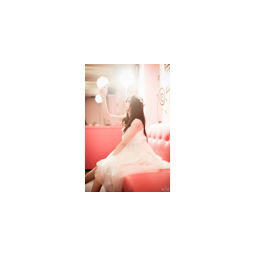

In [174]:
from PIL import Image, ImageDraw, ImageFilter, ImageFont, ImageEnhance

imsize = 256
im = Image.new("RGBA", (imsize, imsize))
# font = ImageFont.truetype('font.ttf', 200, encoding='unic')

# draw = ImageDraw.Draw(im)
# draw.rectangle((0, 0, imsize, imsize), fill=(22, 128, 128))

p = Image.open("/tf/CoordConv-pytorch/data/facebook/60122_528371913855789_1929735771_n.jpg")
p.thumbnail((128, 128))
cx, cy = 128, 128
im.paste(p, (int(cx-p.width/2), int(cy-p.height/2)))

# print()
im
# (int(cx-p.width/2), int(cy-p.height/2))
# p.width, p.height

# p = Image.open("/tf/CoordConv-pytorch/data/freePNGs/Premium PNGs/Animals-/animal-2657793_960_720.png")
# p.thumbnail((60, 60))
# im.alpha_composite(p)

# mask = Image.new('1', (imsize, imsize))
# mask = Image.new('1', (p.width, p.height))
# draw = ImageDraw.Draw(mask)
# draw.text((0, 0), '#HELLO', fill=1)

# im.filter(ImageFilter.GaussianBlur(radius=1))
# im.filter(ImageFilter.MinFilter(3))
# im2
# im.paste(p, (60, 60), mask)



# im.paste(p)

# mask.im



# mask=Image.new('L', im.size, color=255)
# enhancer = ImageEnhance.Contrast(im)
# im2 = enhancer.enhance(0.5)

# mask = Image.new("L", (256, 256))
# draw = ImageDraw.Draw(mask)
# draw.ellipse((30, 30, 60, 60), fill=255)
# mask = mask.filter(ImageFilter.GaussianBlur(10))
# im2.putalpha(mask)

# im.alpha_composite(im2)
# im

In [51]:
action = 4
assert action in [0, 1], action

AssertionError: 4